# Summary

<p class="lead">This notebook summarizes the realtime-kinetic measurements.
</p>

## Requirement

Before running this notebook, you need to pre-process the data with:

- [8-spot bubble-bubble kinetics - Run-All](8-spot bubble-bubble kinetics - Run-All.ipynb)

This pre-processing analyzes the 3 measurement data files, 
compute the moving-window slices, the number of bursts 
and fits the population fractions. All results are saved as TXT in 
the [results](results) folder.

The present notebook loads these results and presents a summary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/anto/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import analysis

numpy: 1.10.2
numba: 0.23.0
lmfit: 0.9.2


/Users/anto/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
filenames = [
    'bubble-bubble-run-off-kinetics-800mW-steer110_12',
    'bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7',
    'bubble-bubble-run-off-kinetics-800mW-steer110_8']

# Measurement 0

  PRE Number of bursts (detrended):  2107.4 MEAN, 11441.3 VAR,  5.429 VAR/MEAN
 POST Number of bursts (detrended):  1526.9 MEAN,  7578.7 VAR,  4.964 VAR/MEAN
POST2 Number of bursts (detrended):  2155.3 MEAN,  8513.3 VAR,  3.950 VAR/MEAN
  PRE Kinetics 30s:     1.910 STD, 0.349 STD detrended.
 POST Kinetics 30s:     2.940 STD, 0.634 STD detrended.
POST2 Kinetics 30s:     2.707 STD, 0.758 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 183.6s  tau(w=30s) = 169.2s  Delta = 7.8%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 186.4s  tau(w=30s) = 186.1s  Delta = 0.2%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 164.2s  tau(w=30s) = 166.6s  Delta = -1.4%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 163.8s  tau(w=30s) = 163.5s  Delta = 0.2%


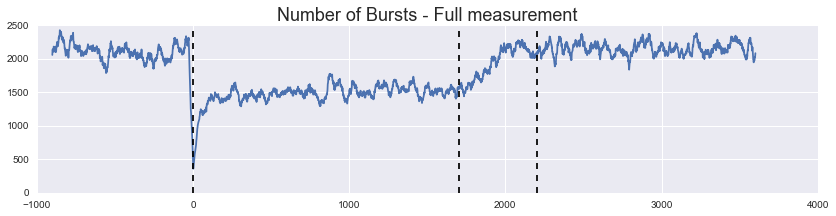

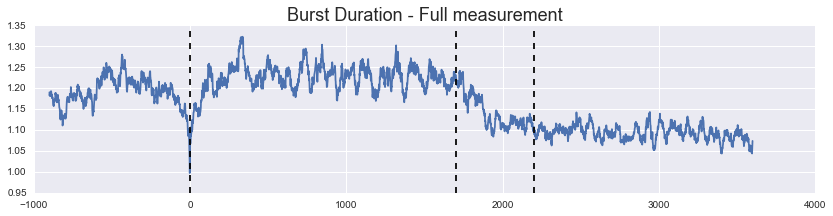

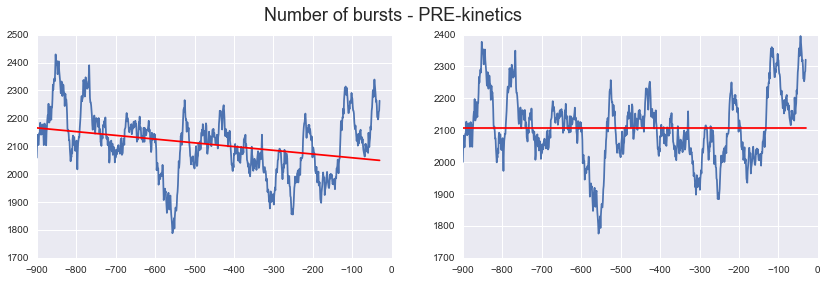

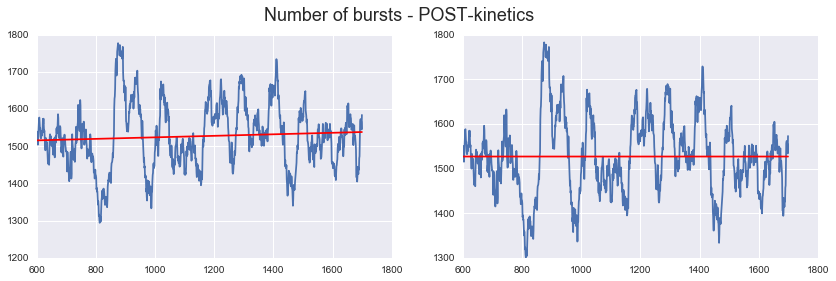

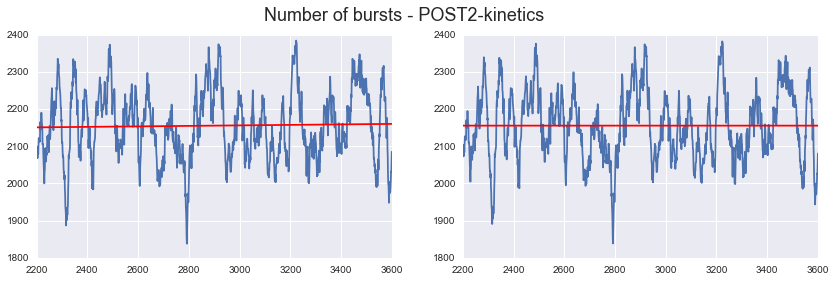

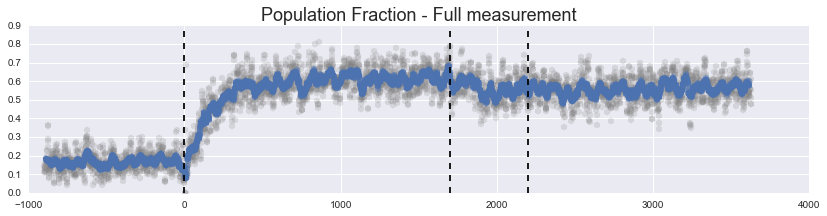

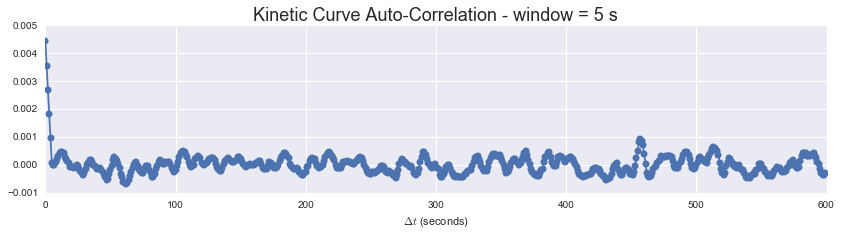

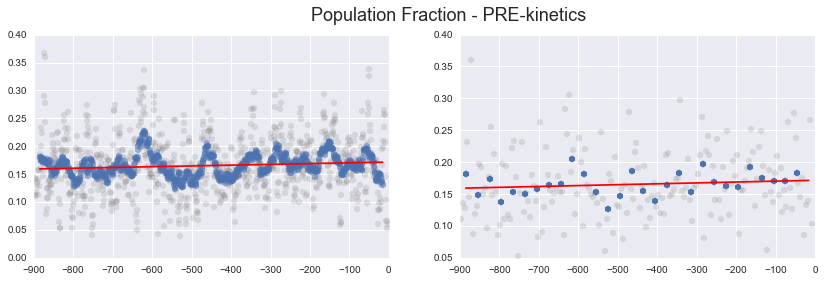

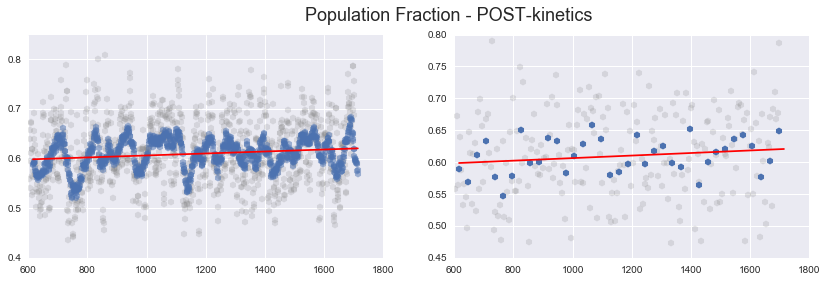

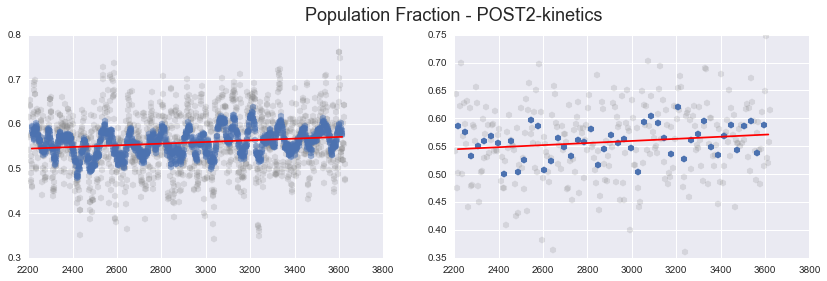

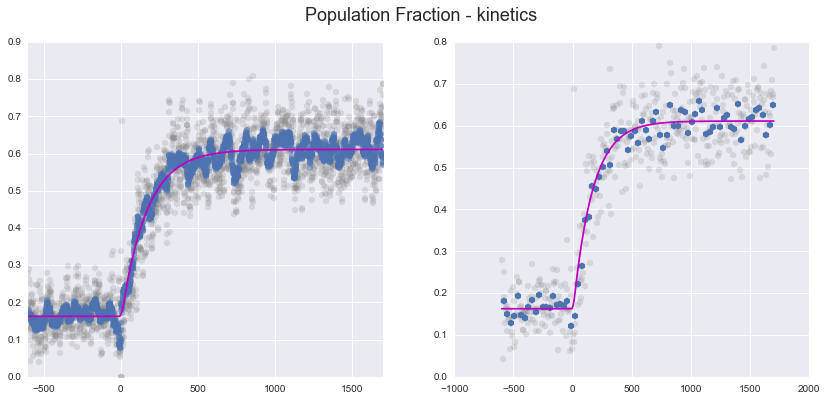

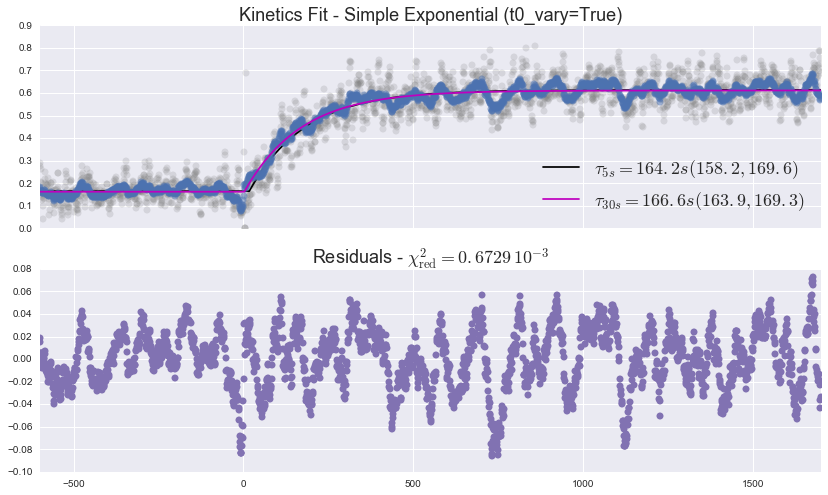

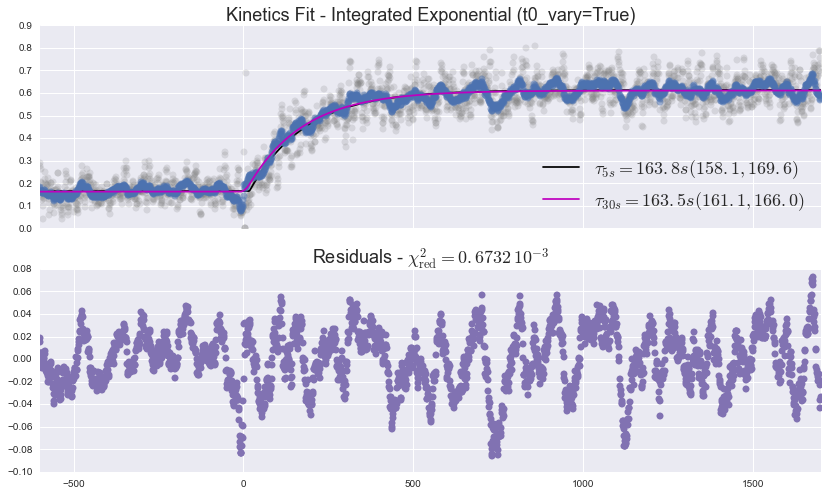

In [4]:
meas_id = 0
fitres, params = analysis.process(filenames[meas_id], post = (600, 1700), post2_start=2200)

In [5]:
res, resw, rest0f, reswt0f, ci, ciw = fitres

In [168]:
res[30].best_values

{'final_value': 0.61143493485448264,
 'init_value': 0.16225900341021493,
 't0': 2.4670405258947081,
 'tau': 166.55338546249826}

In [169]:
import lmfit

In [172]:
res[30].best_values

{'final_value': 0.61143493485448264,
 'init_value': 0.16225900341021493,
 't0': 2.4670405258947081,
 'tau': 166.55338546249826}

In [174]:
resw[30].best_values

{'decimation': 5,
 'final_value': 0.61114045426059882,
 'init_value': 0.16256403923046303,
 'sigma': 0,
 't0': 19.931305878871338,
 't_window': 30,
 'tau': 163.5056547513492}

In [10]:
methods, windows, step = analysis._get_methods_windows_step(filenames[0])

In [11]:
[res[k].redchi for k in sorted(res)]

[0.0041613193271499253, 0.00067285754927839405, 0.00029924064242117294]

In [12]:
[resw[k].redchi for k in sorted(resw)]

[0.0041614323764597675, 0.00067318835888241437, 0.00030358285061519351]

In [13]:
tau = {k: r.best_values['tau'] for k, r in res.items()}
tauw = {k: r.best_values['tau'] for k, r in resw.items()}

In [14]:
tau

{5: 164.18676536573156, 30: 166.55338546249826, 60: 161.7659921616094}

In [15]:
tauw

{5: 163.82161263300273, 30: 163.5056547513492, 60: 157.80873809759723}

In [144]:
p = {window: params['em', window, 1] for window in windows}

## Plot FRET hist evolution

In [233]:
def gauss3():
    peak1 = lmfit.models.GaussianModel(prefix='p1_')
    peak3 = lmfit.models.GaussianModel(prefix='p3_')
    peak2 = lmfit.models.GaussianModel(prefix='p2_')
    model = peak1 + peak2 + peak3
    model.set_param_hint('p1_center', value=0, min=0, max=0.2)
    model.set_param_hint('p2_center', value=0.5, min=0, max=1)
    model.set_param_hint('p3_center', value=0.9, min=0.8, max=1)
    model.set_param_hint('p1_sigma', value=0.02, min=0.01, max=0.2)
    model.set_param_hint('p2_sigma', value=0.02, min=0.01, max=0.2)
    model.set_param_hint('p3_sigma', value=0.02, min=0.01, max=0.1)
    model.set_param_hint('p1_amplitude', value=1, min=0.01)
    model.set_param_hint('p2_amplitude', value=1, min=0.01)
    model.set_param_hint('p3_amplitude', value=1, min=0.01)
    model.name = '3 gauss peaks'
    return model

In [234]:
model = gauss3()

In [281]:
px = p[60]

In [282]:
p_names = ('p1_center', 'p1_sigma', 
           'p2_amplitude', 'p2_center', 'p2_sigma',
           'p3_amplitude', 'p3_center', 'p3_sigma')
params = px.loc[:, p_names]
params['p1_amplitude'] = 1 - params.p2_amplitude - params.p3_amplitude

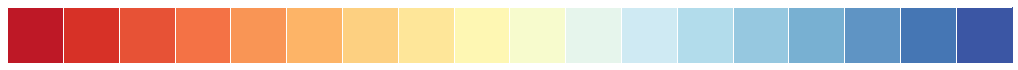

In [340]:
E = np.arange(-0.1, 1.11, 0.001)
time = np.arange(-0, 530, 30)
c = sns.color_palette('RdYlBu', len(time))
sns.palplot(c)

/Users/anto/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


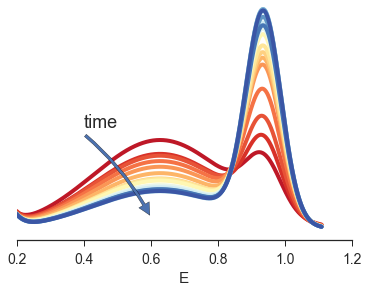

In [364]:
sns.set(font_scale=1.4)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(6, 4))
    for i, t in enumerate(time):
        y_dist = model.eval(x=E, **dict(params.loc[t]))
        plt.plot(E, y_dist, 
                 lw=4, alpha=1, color=c[i % len(c)], label='%d s' % t)

    plt.xlim(0.2)
    #plt.ylim(0, 4)
    plt.xlabel('E')
    plt.ylabel('PDF')
    
    ax.text(0.4, 1.6, 'time', fontsize=18)
    #ax.arrow(0.5, 1.5, 0.2, -1, head_width=0.1, head_length=0.1, overhang=0.2, lw=2, fc='k', ec='k')
    ax.annotate('', xy=(0.6, 0.2,), xytext=(0.4, 1.5), size=15,
                arrowprops=dict(
                                arrowstyle="simple,head_length=0.8,head_width=0.8,tail_width=0.2", 
                                #arrowstyle="->,head_length=0.8,head_width=0.4", 
                                connectionstyle="arc3,rad=-0.1"),
                                color=1,)
    ax.yaxis.set_visible(False)
    sns.despine(fig, ax, trim=True, offset=10, left=True)
    #plt.legend()
    plt.savefig('paper_fig_rk_E_hist.png', dpi=200, bbox_inches='tight')

In [ ]:
ax.yaxis.set_visible(False)

## Load quenched kinetics data

In [145]:
quenchk = pd.DataFrame.from_csv('quenched_kinetics.txt')
quenchk.index.name = 'time'
quenchk.columns=['kinetics']
quenchk.T

time,15,30,60,120,180,300,480,780,1200
kinetics,0.05852,0.1046,0.30983,0.434,0.64508,0.8609,0.88167,0.83907,0.87321


For visualization, normalize quenched kinetics data to same initial and final values as realtime kinetics:

In [146]:
qk_init, qk_final = float(quenchk.iloc[0]), float(quenchk.iloc[-1])
qk_init, qk_final

(0.05852, 0.87321)

In [147]:
w = windows[1]
rk_init = resw[w].best_values['init_value']
rk_final = resw[w].best_values['final_value']
w, rk_init, rk_final

(30, 0.16256403923046303, 0.61114045426059882)

In [148]:
quenchk['norm_kinetics'] = ((quenchk.kinetics - qk_init)/(qk_final - qk_init)
                            *(rk_final - rk_init) + rk_init)

In [149]:
model = models.factory_model_exp()

In [150]:
qk_res = model.fit(np.array(quenchk.kinetics), t=quenchk.index)

 - Adding parameter for hint "t0"
 - Adding parameter for hint "tau"
 - Adding parameter for hint "init_value"
 - Adding parameter for hint "final_value"
 - Adding parameter "t0"
 - Adding parameter "tau"
 - Adding parameter "init_value"
 - Adding parameter "final_value"


In [151]:
qk_res.best_values

{'final_value': 0.88492356844431397,
 'init_value': 0.0038305763251879066,
 't0': 10.086876335068641,
 'tau': 131.49903058185413}

In [152]:
import models

/Users/anto/miniconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


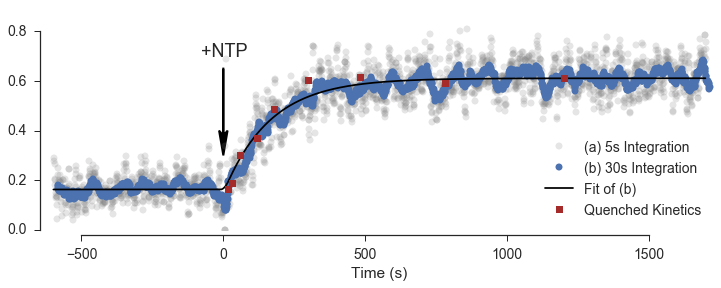

In [367]:
w, wshort = 30, 5
tau_str = (r'$\tau_{%ds} = %.1f s (%.1f, %.1f)$' % (w, tauw[w], ciw[w]['tau'][2][1], ciw[w]['tau'][4][1]))

sns.set(font_scale=1.4)
with sns.axes_style("ticks"): 
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_xlim(-630, 1730)
    ax.plot('tmean', 'kinetics', 'o', alpha=0.2, color='grey', data=p[wshort], label='')
    ax.plot('tmean', 'kinetics', 'o', alpha=1, color=analysis.blue, data=p[w], label='')
    ax.plot(p[w].tstart, models.expwindec_func(p[w].tstart, **resw[w].best_values),
            color='k', label=tau_str)
    #ax.legend(loc='lower right', fontsize=18);
    ax.plot('norm_kinetics', data=quenchk, ls='', marker='s', color='brown')
    ax.set_xlabel('Time (s)')
    ax.legend(loc='lower right', 
              labels=['(a) 5s Integration', '(b) 30s Integration', 'Fit of (b)', 'Quenched Kinetics'],
              fontsize=14)
    ax.text(-80, 0.7, '+NTP', fontsize=18)
    ax.arrow(0, 0.65, 0, -0.25, head_width=30, head_length=0.1, overhang=0.2, lw=2, fc='k', ec='k')
    ax.set_yticks(np.arange(0, 1, 0.2))
    sns.despine(fig, ax, trim=True, offset=5)
    plt.savefig('paper_fig_kinetics.png', dpi=200, bbox_inches='tight')

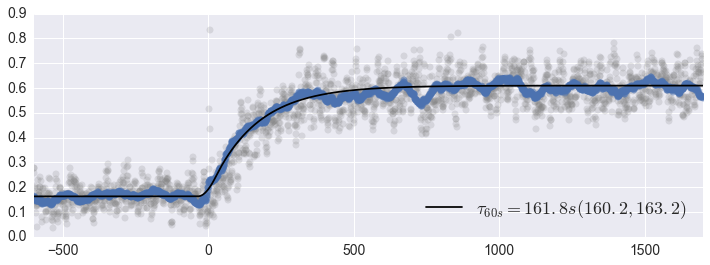

In [132]:
w, wshort = 60, 5
tau_str = (r'$\tau_{%ds} = %.1f s (%.1f, %.1f)$' % (w, tau[w], ci[w]['tau'][2][1], ci[w]['tau'][4][1]))

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(-600, 1700)
ax.plot('tstart', 'kinetics', 'o', alpha=0.2, color='grey', data=p[wshort], label='')
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, color=analysis.blue, data=p[w], label='')
ax.plot(p[w].tstart, models.expwindec_func(p[w].tstart, **resw[w].best_values),
        color='k', label=tau_str)
ax.legend(loc='lower right', fontsize=18)

## Save Fit Results in DataFrame

### Create DataFrame

In [19]:
index = pd.MultiIndex.from_product([(0, 1, 2), windows, (True, False), (True, False)], 
                                   names=['meas_id', 'window', 'integr', 't0_vary'])
index

MultiIndex(levels=[[0, 1, 2], [5, 30, 60], [False, True], [False, True]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['meas_id', 'window', 'integr', 't0_vary'])

In [20]:
fitdata = pd.DataFrame(index=index, columns=['tau', 't0', 'init_value', 'final_value', 'redchi'])
#fitdata

In [28]:
# Show first row
fitdata.iloc[0:1]

,,,,tau,t0,init_value,final_value,redchi
meas_id,window,integr,t0_vary,,,,,
0,5,True,True,NaN,NaN,NaN,NaN,NaN


### Fill DataFrame

In [24]:
meas_id

0

In [28]:
for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

# Measurement 1

  PRE Number of bursts (detrended):  1259.5 MEAN,  8054.8 VAR,  6.395 VAR/MEAN
 POST Number of bursts (detrended):   829.8 MEAN,  2896.6 VAR,  3.491 VAR/MEAN
POST2 Number of bursts (detrended):  1214.9 MEAN,  4534.8 VAR,  3.733 VAR/MEAN
  PRE Kinetics 30s:     2.846 STD, 1.689 STD detrended.
 POST Kinetics 30s:     4.074 STD, 0.308 STD detrended.
POST2 Kinetics 30s:     3.243 STD, 0.767 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 168.8s  tau(w=30s) = 156.9s  Delta = 7.1%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 153.7s  tau(w=30s) = 174.1s  Delta = -13.2%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 116.4s  tau(w=30s) = 120.6s  Delta = -3.6%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 116.7s  tau(w=30s) = 120.7s  Delta = -3.4%


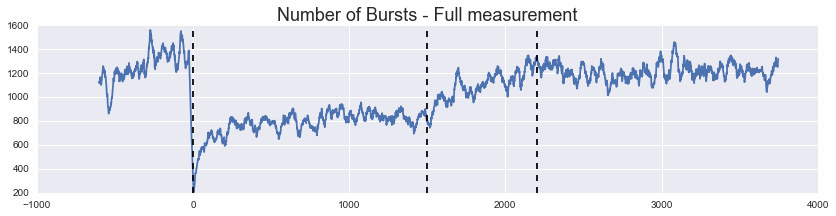

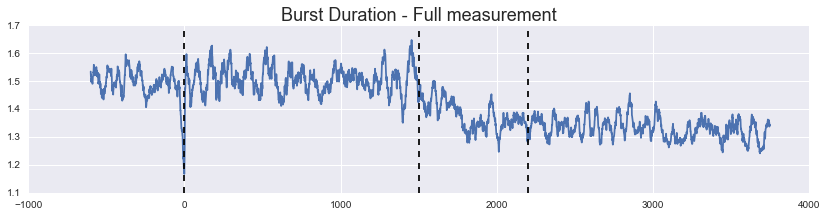

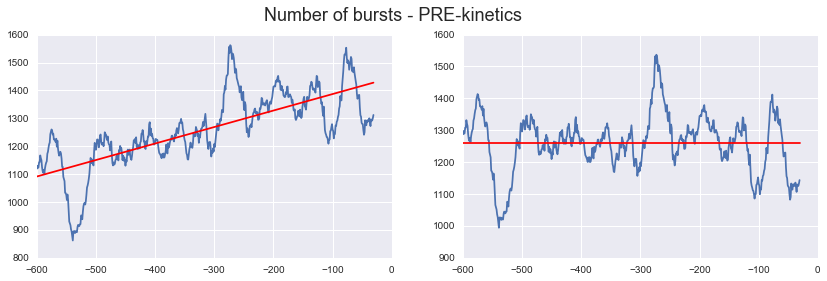

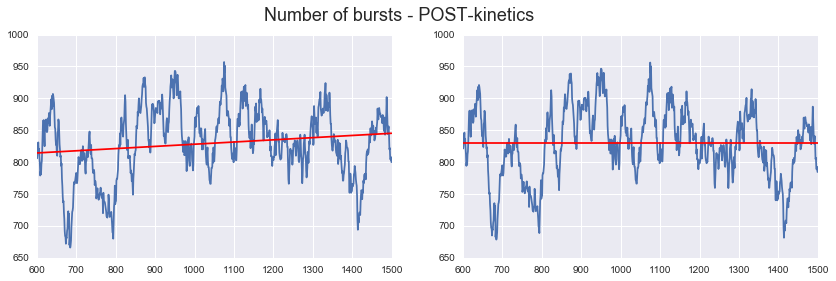

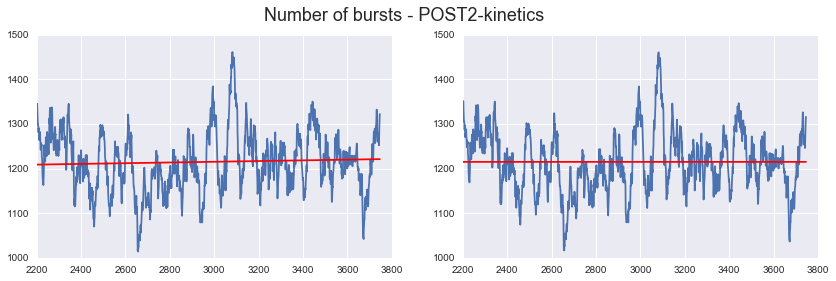

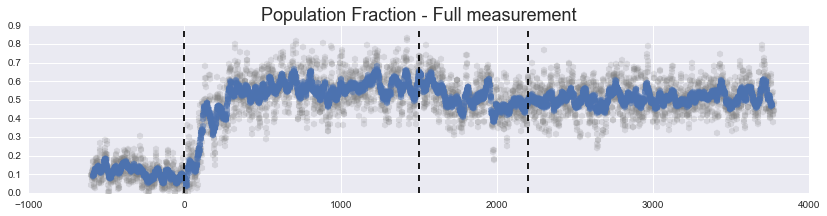

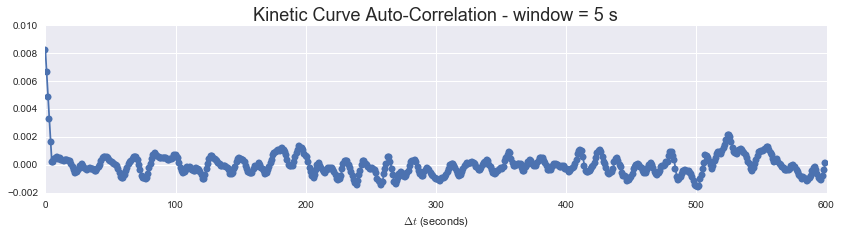

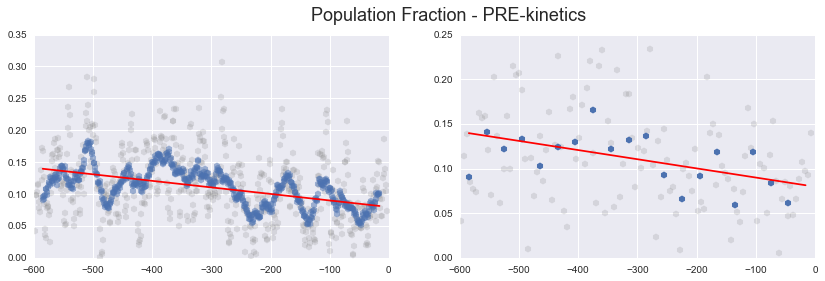

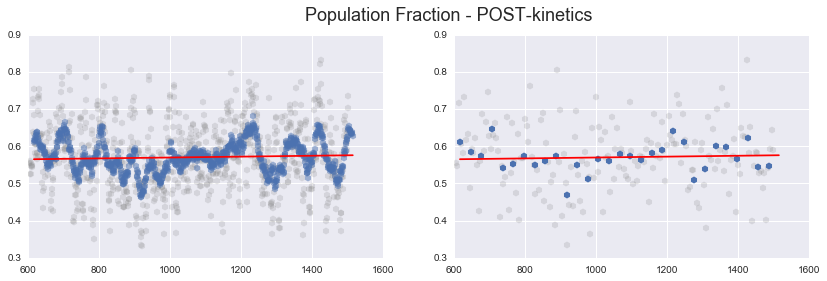

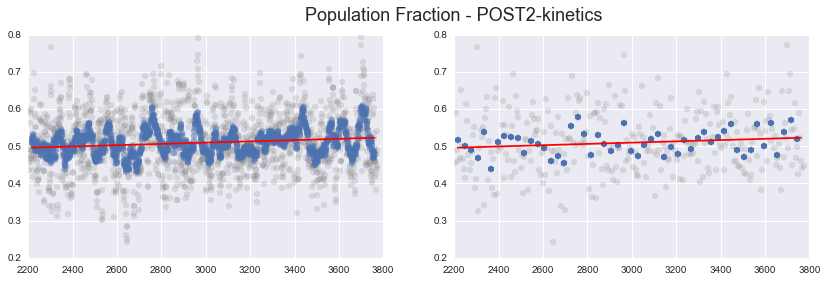

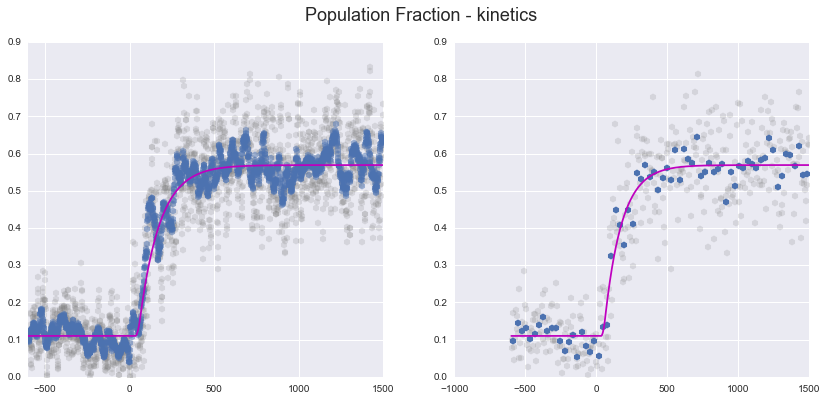

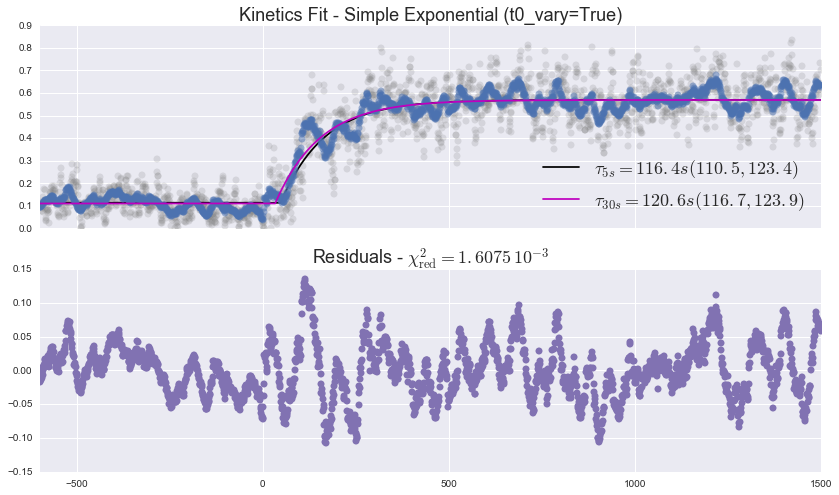

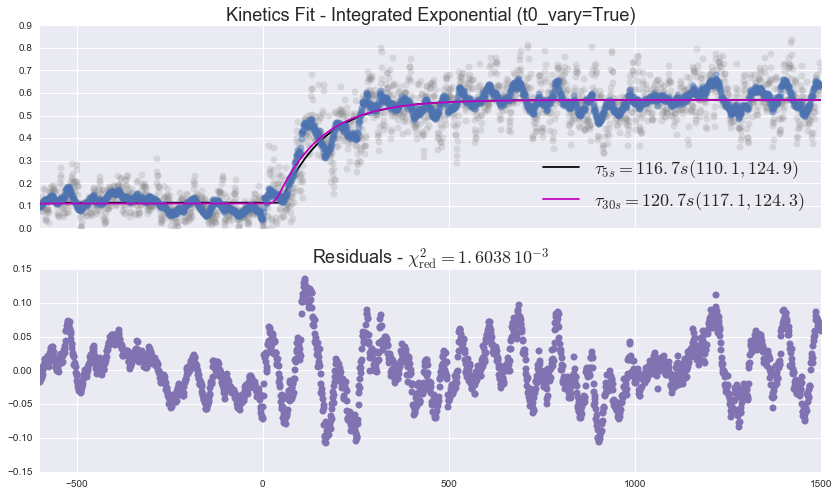

In [30]:
meas_id = 1
fitres, params = analysis.process(filenames[meas_id], post = (600, 1500), post2_start=2200)

In [31]:
params = analysis.load_fit_data(filenames[meas_id])

In [32]:
kin = (-600, 1600)
p1 = params['em', 5, 1]
p2 = params['em', 30, 1]
p3 = params['em', 60, 1]
p2.index = p2.tstart
p2k = p2.loc[kin[0]:kin[1]]
p3.index = p3.tstart
p3k = p3.loc[kin[0]:kin[1]]

In [33]:
import models

In [34]:
methods, windows, step = analysis._get_methods_windows_step(filenames[1])
decimation = 5
method = 'nelder'
windows

[5, 30, 60]

In [35]:
t0_vary = True
modelw3 = models.factory_model_expwin(tau=150, t_window=windows[2], decimation=decimation, t0_vary=t0_vary)
resw3 = modelw3.fit(np.array(p3k.kinetics), t=p3k.tstart, verbose=False, method=method)
resw3 = modelw3.fit(np.array(p3k.kinetics), t=p3k.tstart, verbose=False)
resw3.best_values

{'decimation': 5,
 'final_value': 0.57112767721917068,
 'init_value': 0.10858471416796867,
 'sigma': 0,
 't0': 41.708463905916012,
 't_window': 60,
 'tau': 128.458778558337}

In [36]:
t0_vary = True
modelw2 = models.factory_model_expwin(tau=150, t_window=windows[1], decimation=decimation, t0_vary=t0_vary)
resw2 = modelw2.fit(np.array(p2k.kinetics), t=p2k.tstart, verbose=False, method=method)
resw2 = modelw2.fit(np.array(p2k.kinetics), t=p2k.tstart, verbose=False)
resw2.best_values

{'decimation': 5,
 'final_value': 0.5713057958289971,
 'init_value': 0.10975451388534663,
 'sigma': 0,
 't0': 46.262882262021478,
 't_window': 30,
 'tau': 123.5179918846532}

(-600, 1600)

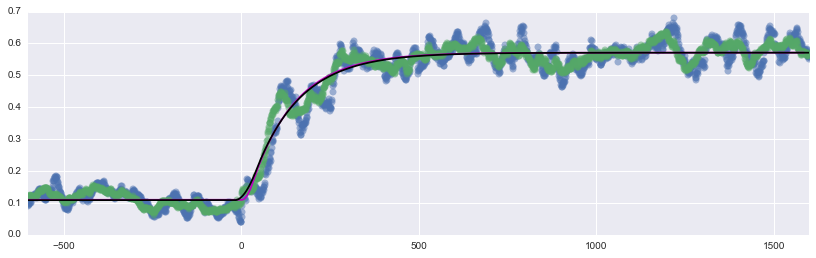

In [37]:
fig_width = 14
fig, ax = plt.subplots(figsize=(fig_width, 4))
#ax.plot('tstart', 'kinetics', 'o', alpha=0.2, color='grey', data=p1)
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, data=p2k)
ax.plot('tstart', 'kinetics', 'o', alpha=0.5, data=p3k)
ax.plot(p2k.tstart-15, models.expwindec_func(p2k.tstart, **resw2.best_values), 'm')
ax.plot(p3k.tstart, models.expwindec_func(p3k.tstart, **resw3.best_values), 'k')
ax.set_xlim(kin[0], kin[1])
# ax.text(kin[0]+50, 0.62, r'$\tau_{5s} = %.1f s (%.1f, %.1f)$' % (tauw1, ciw1['tau'][2][1], ciw1['tau'][4][1]), fontsize=18)
#ax.text(kin[0]+50, 0.52, r'$\tau_{30s} = %.1f s (%.1f, %.1f)$' % (tauw2, ciw2['tau'][2][1], ciw2['tau'][4][1]), fontsize=18)
# title = 'Kinetics Fit - Intergrated Exponential (t0_vary=%s)' % t0_vary
# ax.set_title(title, fontsize=fs)

## Save results 1

In [38]:
meas_id

1

In [39]:
methods, windows, step = analysis._get_methods_windows_step(filenames[meas_id])
res, resw, rest0f, reswt0f, ci, ciw = fitres

for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

# Measurement 2

  PRE Number of bursts (detrended):  1488.2 MEAN, 11869.6 VAR,  7.976 VAR/MEAN
 POST Number of bursts (detrended):  1082.9 MEAN,  3898.1 VAR,  3.600 VAR/MEAN
POST2 Number of bursts (detrended):  1470.0 MEAN,  5569.3 VAR,  3.789 VAR/MEAN
  PRE Kinetics 30s:     2.245 STD, 0.876 STD detrended.
 POST Kinetics 30s:     3.759 STD, 1.080 STD detrended.
POST2 Kinetics 30s:     3.129 STD, 1.099 STD detrended.
 FIT  Simple Exp (t0_vary=False):  tau(w=5s) = 176.7s  tau(w=30s) = 165.8s  Delta = 6.2%
 FIT  Window Exp (t0_vary=False):  tau(w=5s) = 176.0s  tau(w=30s) = 183.5s  Delta = -4.3%
 FIT  Simple Exp (t0_vary=True):  tau(w=5s) = 161.9s  tau(w=30s) = 168.7s  Delta = -4.2%
 FIT  Window Exp (t0_vary=True):  tau(w=5s) = 161.7s  tau(w=30s) = 168.2s  Delta = -4.0%


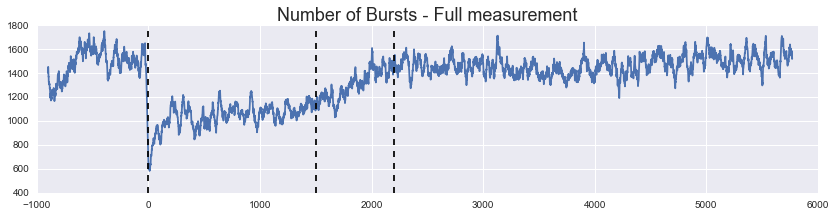

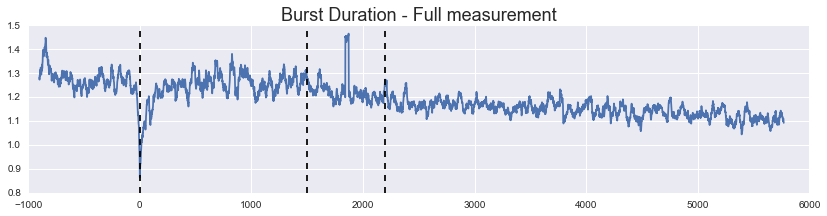

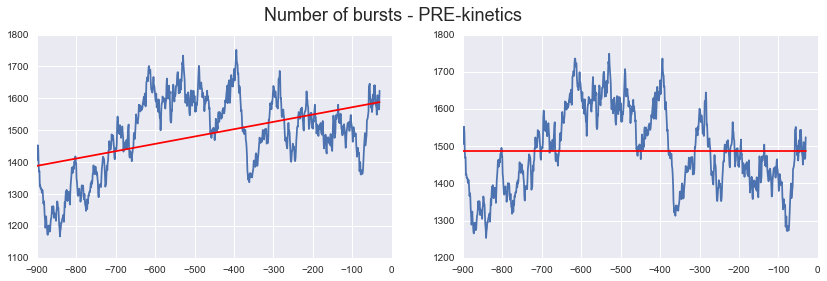

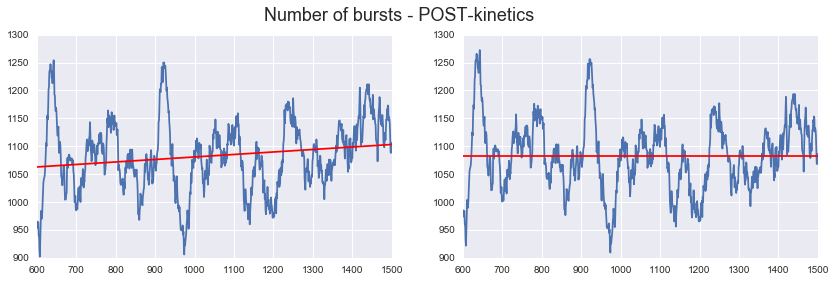

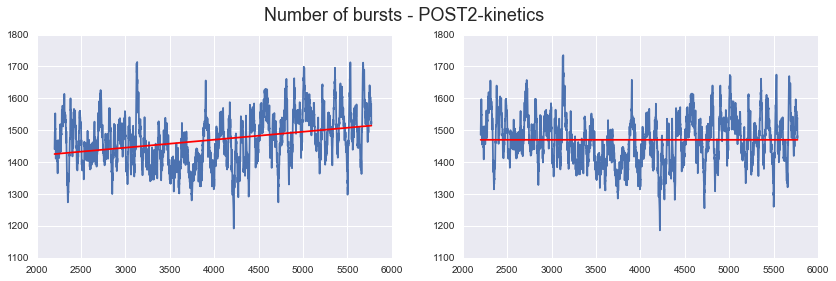

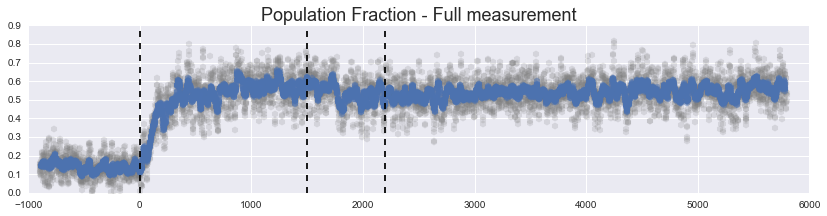

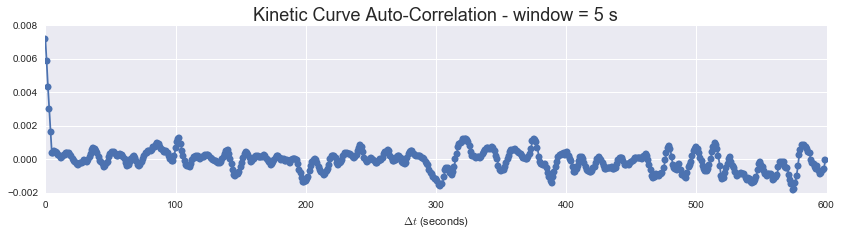

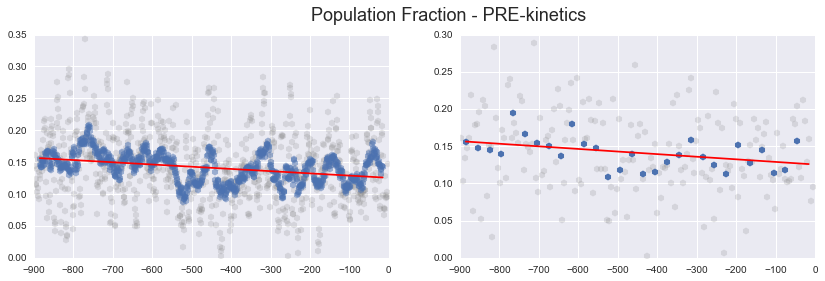

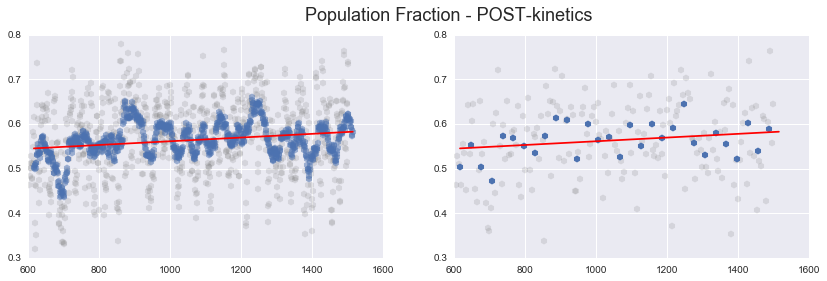

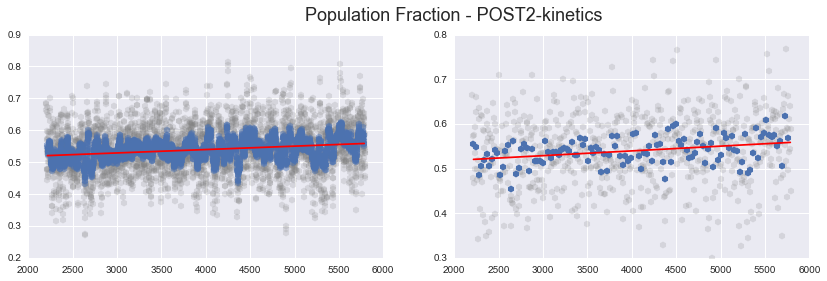

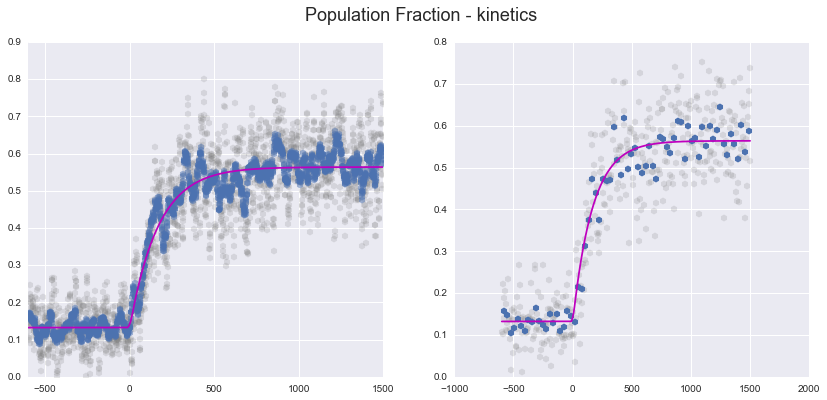

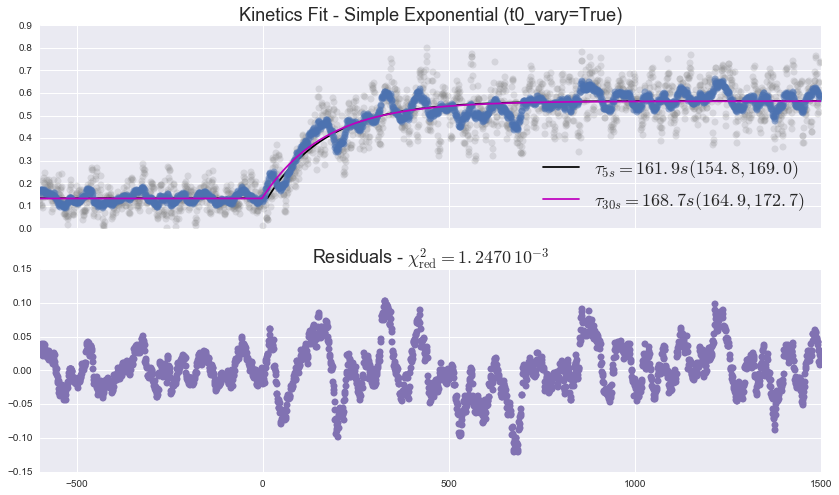

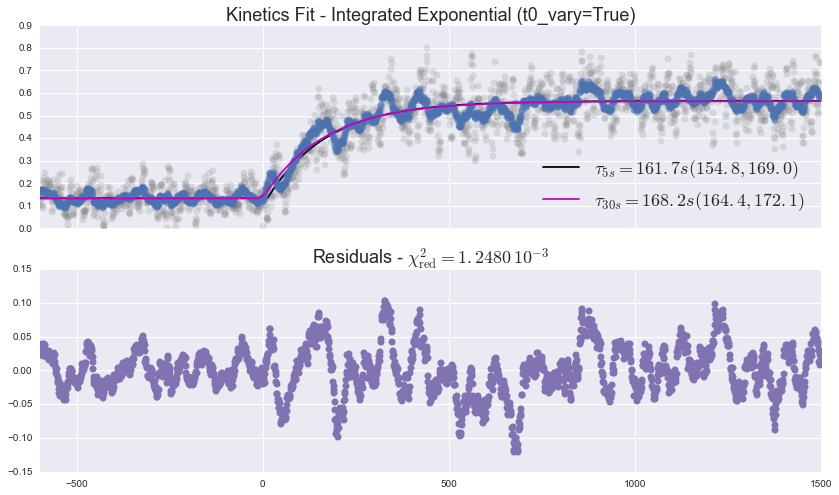

In [40]:
meas_id = 2
fitres, params = analysis.process(filenames[meas_id], post = (600, 1500), post2_start=2200)

## Save results 2

In [41]:
meas_id

2

In [42]:
methods, windows, step = analysis._get_methods_windows_step(filenames[meas_id])
res, resw, rest0f, reswt0f, ci, ciw = fitres

for i, w in enumerate(windows):
    fitdata.loc[meas_id, w, False, True] = {**res[w].best_values, 'redchi': res[w].redchi*1e3} 
    fitdata.loc[meas_id, w, False, False] = {**rest0f[w].best_values, 'redchi': rest0f[w].redchi*1e3} 
    fitdata.loc[meas_id, w, True, True] = {**resw[w].best_values, 'redchi': resw[w].redchi*1e3}
    fitdata.loc[meas_id, w, True, False] = {**reswt0f[w].best_values, 'redchi': reswt0f[w].redchi*1e3}

In [43]:
fitdata.sortlevel(0, axis=0, inplace=True)

In [44]:
df = fitdata.xs((False, True), level=('integr', 't0_vary'))
dfw = fitdata.xs((True, True), level=('integr', 't0_vary'))

In [45]:
fitdata.loc[(slice(None), slice(30,60), True, True), ]

tau       t0 init_value final_value  \
meas_id window integr t0_vary                                            
0       30     True   True     163.506  19.9313   0.162564     0.61114   
        60     True   True     157.809  23.7341   0.162975    0.609674   
1       30     True   True     120.672  47.3153   0.109845    0.569172   
        60     True   True     126.225  42.3738   0.108583    0.569324   
2       30     True   True     168.239  12.6022   0.132293    0.563885   
        60     True   True     165.227  15.7478   0.131781    0.563355   

                                 redchi  
meas_id window integr t0_vary            
0       30     True   True     0.673188  
        60     True   True     0.303583  
1       30     True   True      1.60378  
        60     True   True     0.793591  
2       30     True   True      1.24797  
        60     True   True     0.619944

In [46]:
dfw - df

tau        t0   init_value  final_value       redchi
meas_id window                                                           
0       5      -0.365159   2.72965  4.96702e-05 -3.60776e-05  0.000113049
        30      -3.04773   17.4643  0.000305035 -0.000294482   0.00033081
        60      -3.95723   32.6588  2.51897e-05 -0.000358177   0.00434221
1       5       0.330749  -13.9014 -5.07153e-05  3.84005e-05  0.000167254
        30      0.117062   14.3658 -0.000269085  8.00177e-06  -0.00369372
        60      -1.46048   29.9955 -0.000581931 -0.000145887  -0.00285451
2       5      -0.142896 -0.471137  1.86898e-05 -1.53545e-05  0.000240662
        30     -0.508881   15.0915 -7.72634e-05 -5.80653e-05   0.00097192
        60      -3.51576   31.7989 -0.000180928 -0.000415957  -0.00140696

In [47]:
fitdata

tau       t0 init_value final_value  \
meas_id window integr t0_vary                                            
0       5      False  False    183.609        0   0.162264    0.615513   
                      True     164.187  17.0798   0.164773    0.613526   
               True   False    186.429        0   0.161934    0.615808   
                      True     163.822  19.8094   0.164823     0.61349   
        30     False  False    169.219        0   0.161858    0.611695   
                      True     166.553  2.46704   0.162259    0.611435   
               True   False     186.11        0   0.159609    0.613411   
                      True     163.506  19.9313   0.162564     0.61114   
        60     False  False    152.375        0   0.164494    0.609148   
                      True     161.766 -8.92469   0.162949    0.610032   
               True   False    184.552        0   0.159394    0.612288   
                      True     157.809  23.7341   0.162975    0.609674   
1       5      False  False    168.814        0   0.106361    0.575555   
                      True      116.39  47.8324   0.113357    0.569784   
               True   False    153.695        0   0.107929    0.573892   
                      True      116.72   33.931   0.113306    0.569822   
        30     False  False    156.851        0   0.105021    0.573174   
                      True     120.555  32.9496   0.110114    0.569164   
               True   False    174.053        0   0.102934    0.575153   
                      True     120.672  47.3153   0.109845    0.569172   
        60     False  False    141.082        0    0.10713    0.570924   
                      True     127.685  12.3783   0.109165     0.56947   
               True   False    174.262        0   0.102372     0.57465   
                      True     126.225  42.3738   0.108583    0.569324   
2       5      False  False    176.725        0    0.13184    0.567066   
                      True     161.888  12.2727   0.133506    0.565257   
               True   False     175.98        0   0.131908    0.566975   
                      True     161.745  11.8015   0.133525    0.565242   
        30     False  False    165.811        0   0.132739    0.563588   
                      True     168.748 -2.48932    0.13237    0.563943   
               True   False    183.543        0   0.130531     0.56577   
                      True     168.239  12.6022   0.132293    0.563885   
        60     False  False    150.044        0   0.134453    0.561545   
                      True     168.743 -16.0511   0.131962    0.563771   
               True   False    184.356        0   0.129546    0.565683   
                      True     165.227  15.7478   0.131781    0.563355   

                                 redchi  
meas_id window integr t0_vary            
0       5      False  False     4.19489  
                      True      4.16132  
               True   False     4.20499  
                      True      4.16143  
        30     False  False    0.673155  
                      True     0.672858  
               True   False    0.722131  
                      True     0.673188  
        60     False  False    0.309909  
                      True     0.299241  
               True   False     0.35985  
                      True     0.303583  
1       5      False  False     7.49178  
                      True      7.33947  
               True   False     7.41218  
                      True      7.33963  
        30     False  False     1.70339  
                      True      1.60747  
               True   False     1.83176  
                      True      1.60378  
        60     False  False    0.813664  
                      True     0.796445  
               True   False     1.01219  
                      True     0.793591  
2       5      False  False     6.15589  
                      True      6.13629  
               True   False     6.15423  
    

In [48]:
fitdata.to_csv('results/8-spot-bubble-bubble-fitdata.csv')